# Prediction of Car Prices
        In this notebook I have built a Linear Regression Model to predict the Prices of the Car using Important Features.
        In this file there are five sections 
        1. Data Understanding and Exploration
        2. Data Visualization
        3. Data Cleaning
        4. Model Building 
        5. Model Evaluation


## 1. Data Understanding and Exploration

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries
import numpy as np
import pandas as pd

In [3]:
# Reading the dataset
df=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
#Basic View of Data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- > The Data set does not have any Null Values

In [8]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [9]:
df.car_ID.nunique()

205

- >The Column Car_Id is unique and we have any use with that so we can drop that column.

In [10]:
print("Shape Before Dropping Car Id:",df.shape)
df.drop('car_ID',axis=1,inplace=True)
print("Shape After Dropping Car Id:",df.shape)

Shape Before Dropping Car Id: (205, 26)
Shape After Dropping Car Id: (205, 25)


## 2. Data Visualization 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


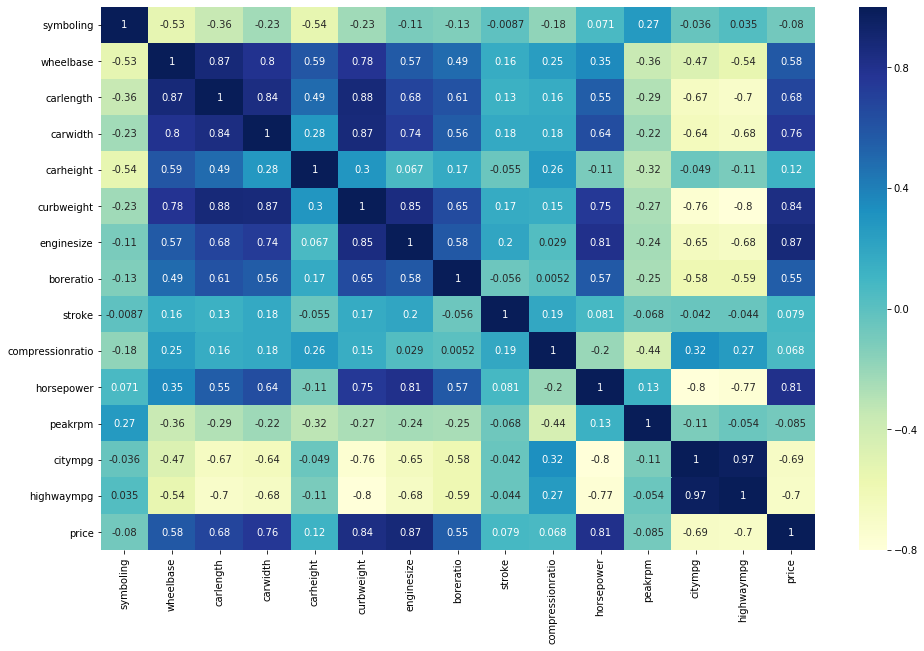

In [13]:
# Check the correlation of numerical columns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### There  is multicolinearity in the data set so we need to remove one among the two highly corelated features

Text(0.5, 0, 'Price')

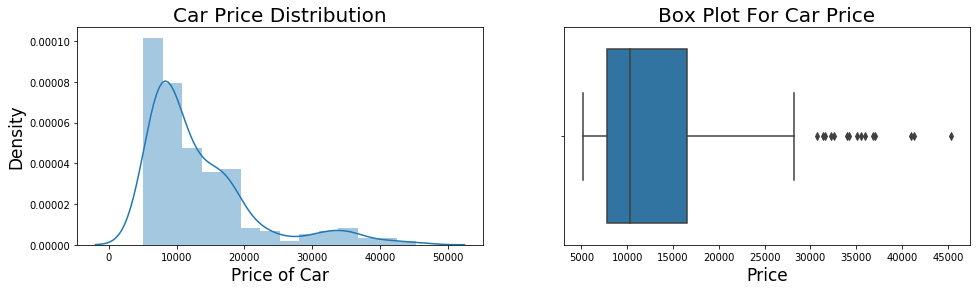

In [14]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.title("Car Price Distribution", fontsize=20)
plt.xlabel("Price of Car", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.title("Box Plot For Car Price", fontsize=20)
plt.xlabel("Price", fontsize=17)

Text(0.5, 0, 'Engine size')

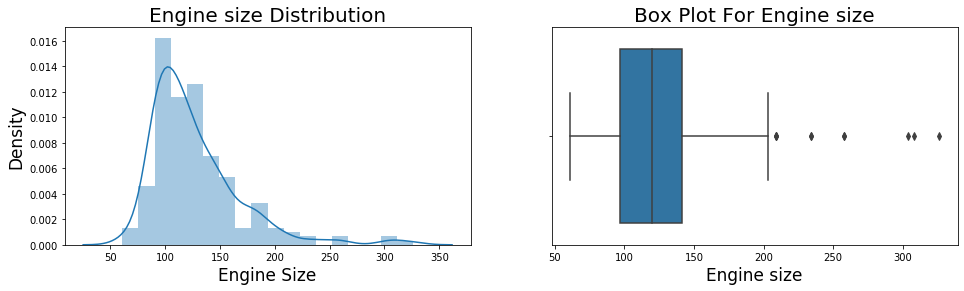

In [15]:
#Plotting the Engine size
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['enginesize'])
plt.title("Engine size Distribution", fontsize=20)
plt.xlabel("Engine Size", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['enginesize'])
plt.title("Box Plot For Engine size", fontsize=20)
plt.xlabel("Engine size", fontsize=17)

Text(0.5, 0, 'Curb Weight')

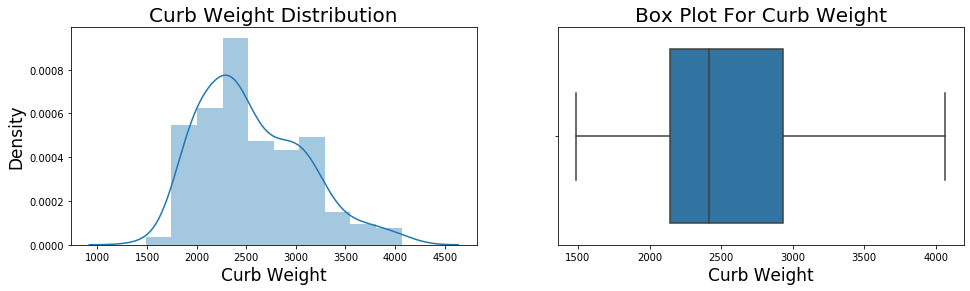

In [16]:
#Plotting the Curbweight
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['curbweight'])
plt.title("Curb Weight Distribution", fontsize=20)
plt.xlabel("Curb Weight", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['curbweight'])
plt.title("Box Plot For Curb Weight", fontsize=20)
plt.xlabel("Curb Weight", fontsize=17)

Text(0.5, 0, 'Horse Power')

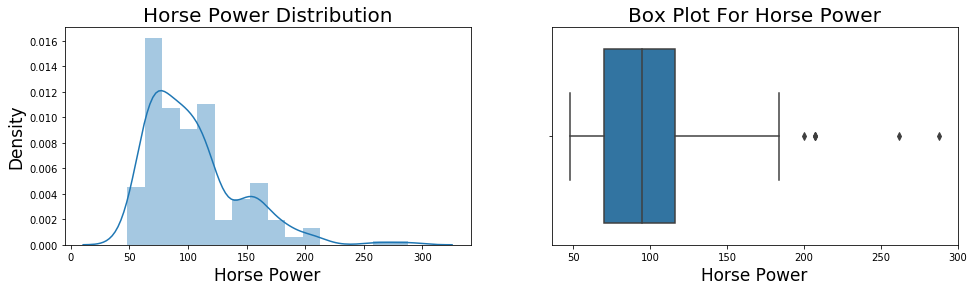

In [17]:
#Plotting the Horsepower
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['horsepower'])
plt.title("Horse Power Distribution", fontsize=20)
plt.xlabel("Horse Power", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['horsepower'])
plt.title("Box Plot For Horse Power", fontsize=20)
plt.xlabel("Horse Power", fontsize=17)

Text(0.5, 0, 'Car Width')

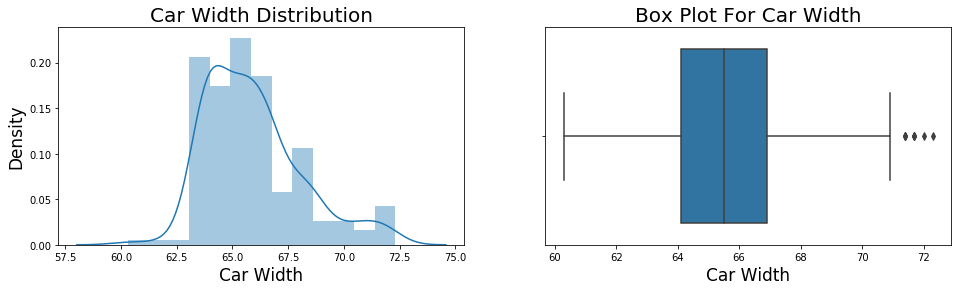

In [18]:
#Plotting the Car width
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['carwidth'])
plt.title("Car Width Distribution", fontsize=20)
plt.xlabel("Car Width", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['carwidth'])
plt.title("Box Plot For Car Width", fontsize=20)
plt.xlabel("Car Width", fontsize=17)

Text(0.5, 0, 'Car Length')

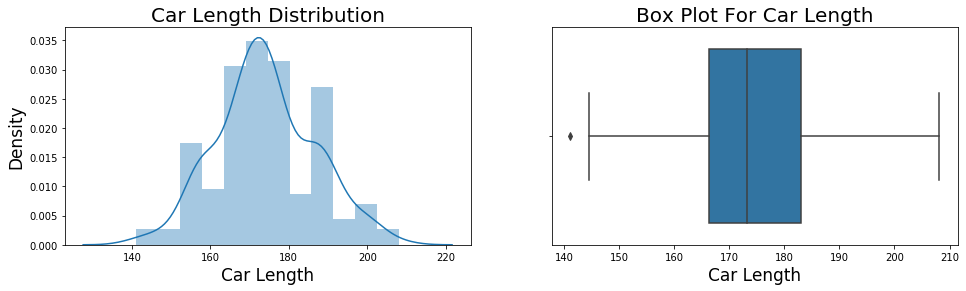

In [19]:
#Plotting the Car length
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['carlength'])
plt.title("Car Length Distribution", fontsize=20)
plt.xlabel("Car Length", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['carlength'])
plt.title("Box Plot For Car Length", fontsize=20)
plt.xlabel("Car Length", fontsize=17)

Text(0.5, 0, 'Wheel Base')

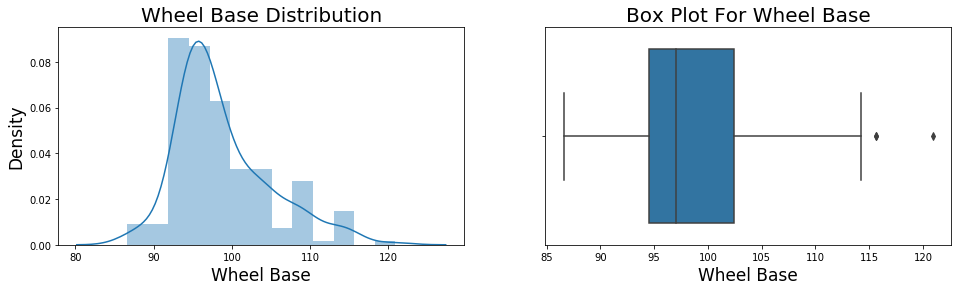

In [20]:
#Plotting the Wheelbase
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['wheelbase'])
plt.title("Wheel Base Distribution", fontsize=20)
plt.xlabel("Wheel Base", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['wheelbase'])
plt.title("Box Plot For Wheel Base", fontsize=20)
plt.xlabel("Wheel Base", fontsize=17)

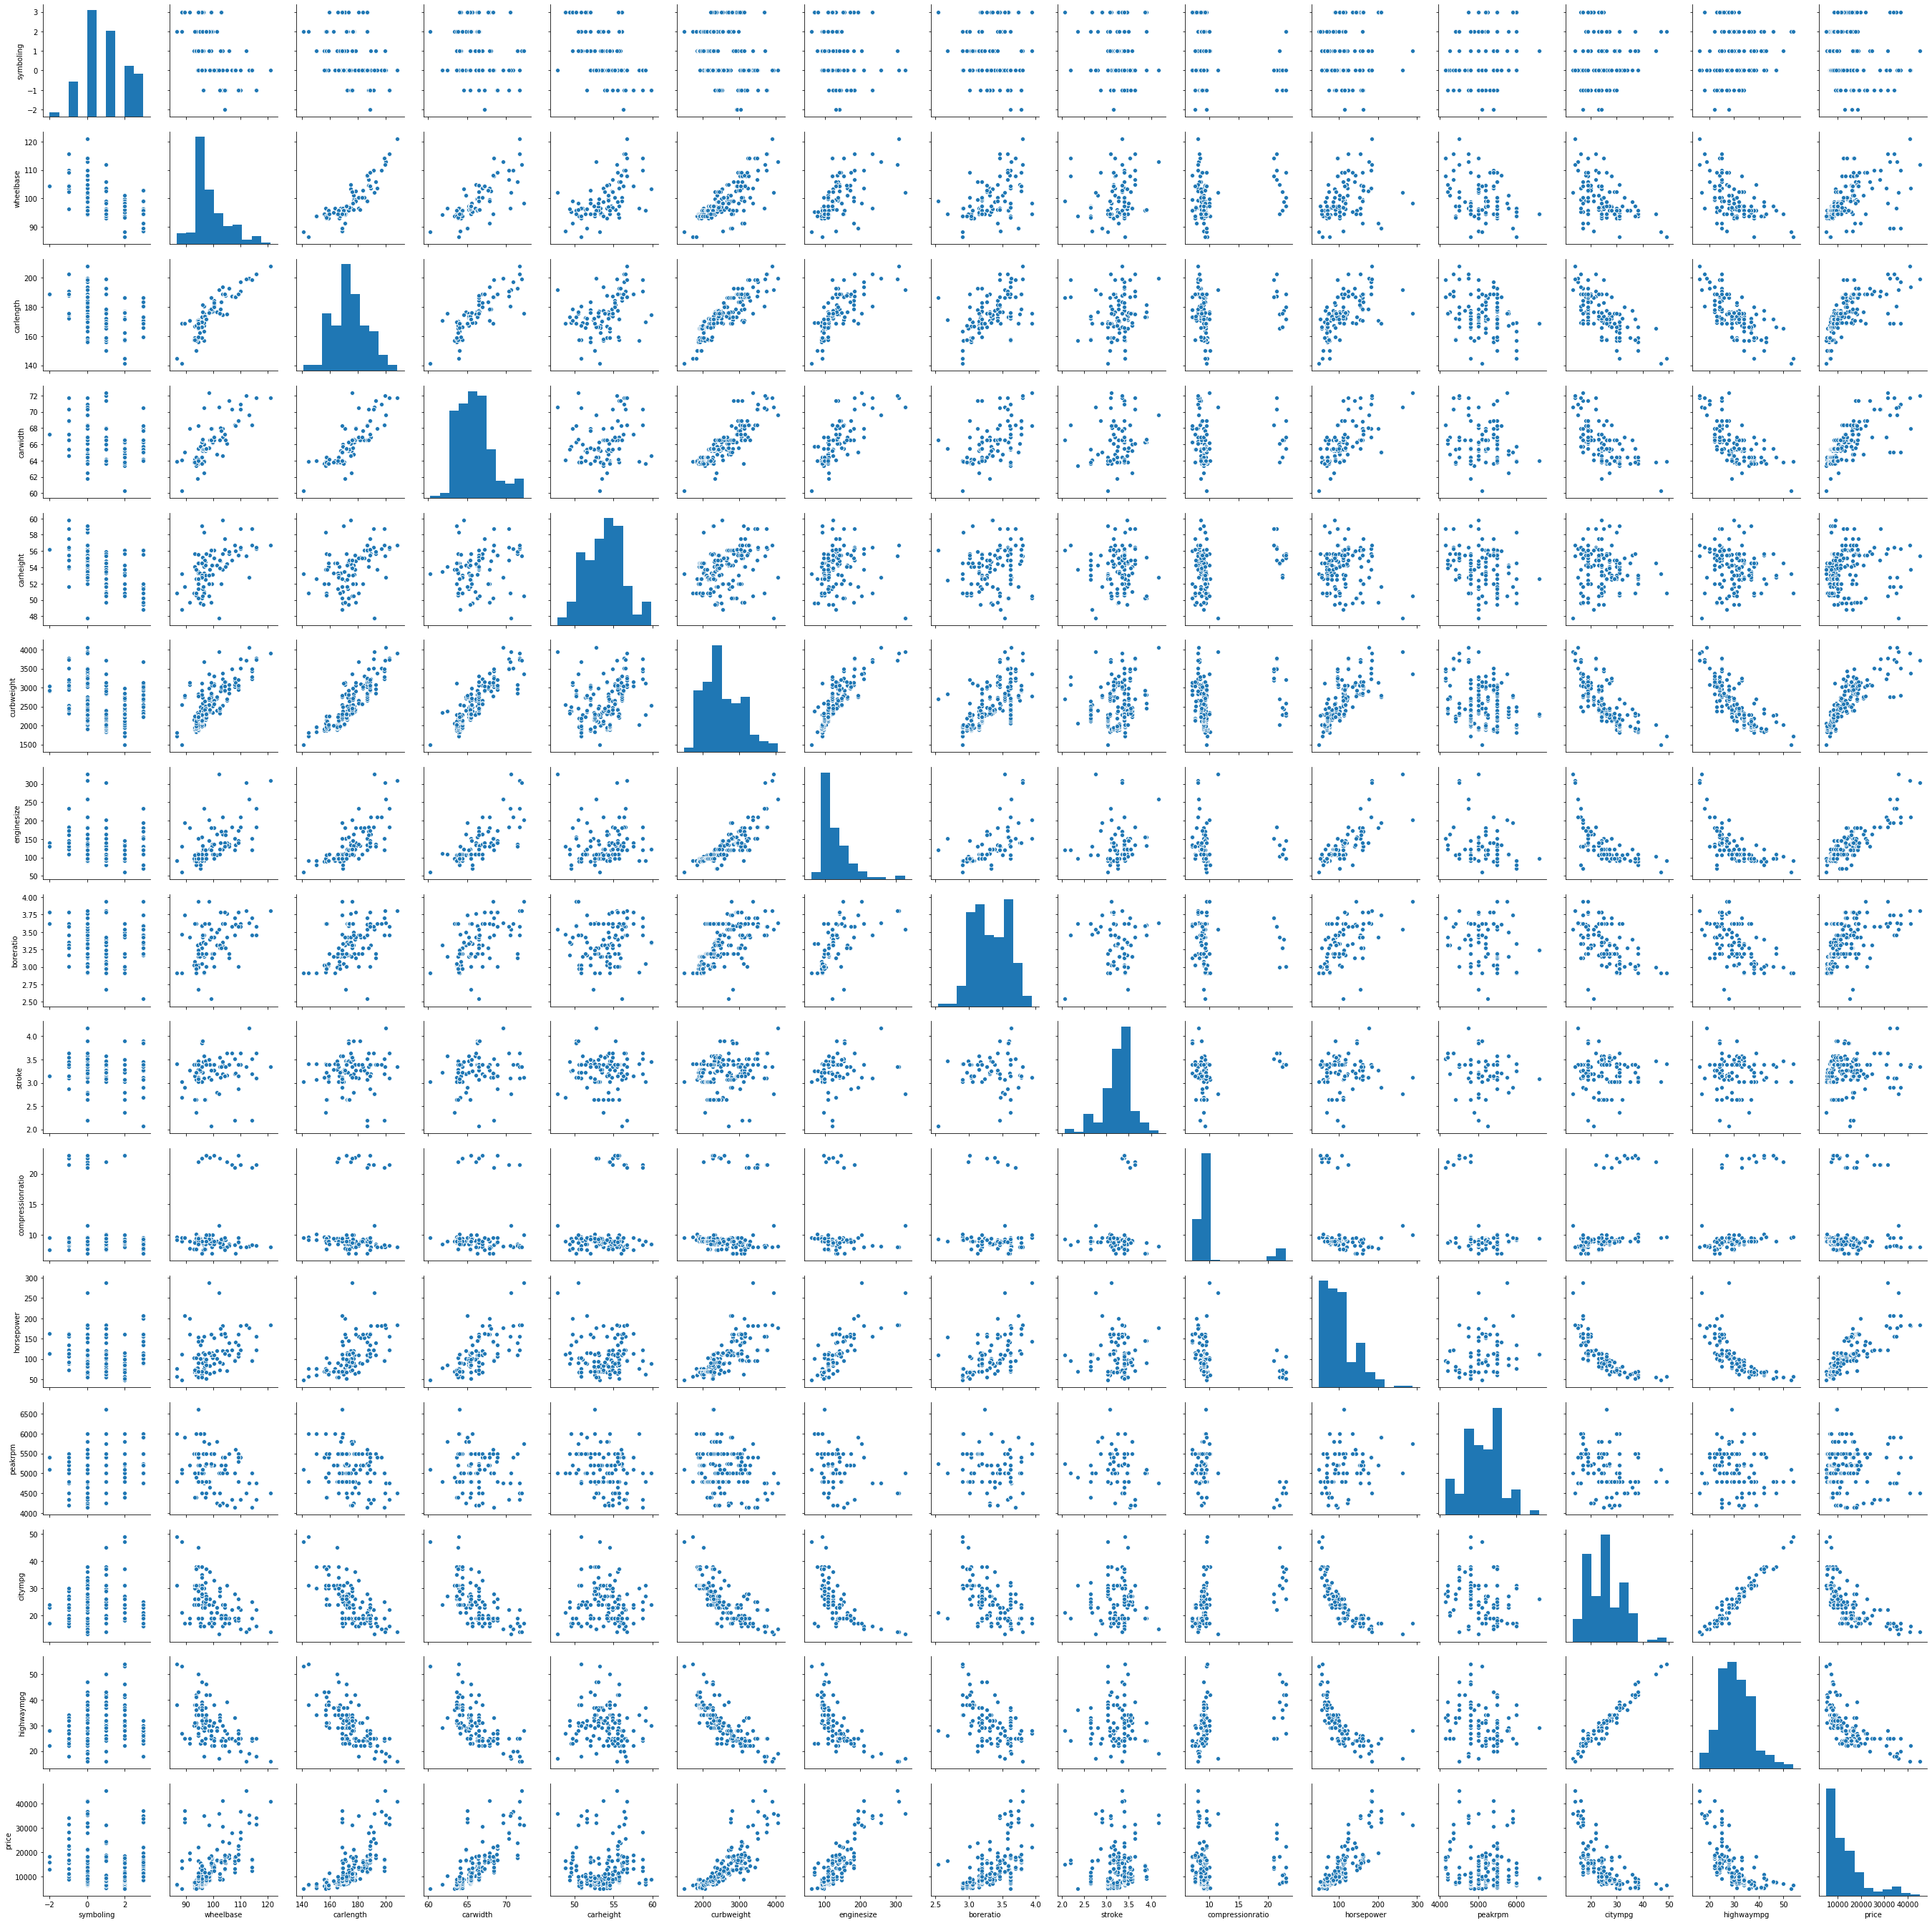

In [21]:
# Let's now make pairwise plot to see for a trend.
sns.pairplot(df)
plt.show()

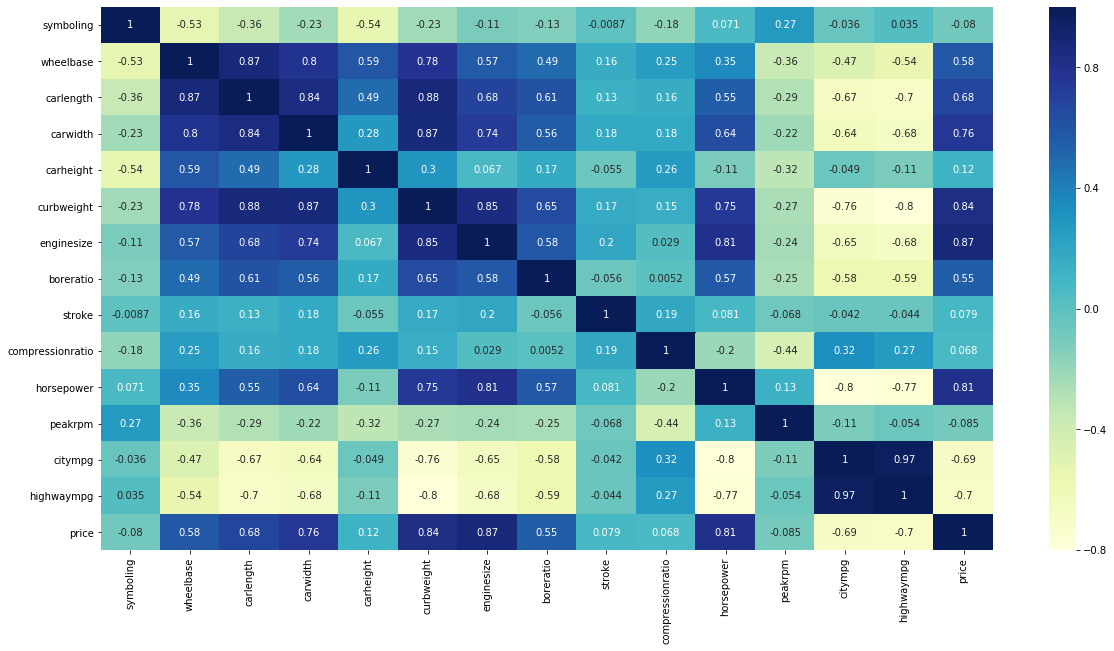

In [22]:
#Heat map for Checking the Co-realtion between Variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

- >     Here we can see that some columns are highly co-related with each other.
            
            carlength  and wheelbase  co-relation value=0.87
            carlength  and carwidth   co-realtion value=0.84
            carlength  and curbweight co-realtion value=0.88
            carwidth   and curbweight co-relation value=0.86
            enginesize and curbweight co-relation value=0.85
            enginesize and horsepower co-relation value=0.81
            carwidth   and wheelbase  co-relation value=0.80
            highwaympg and citympg    co-relation value=0.97
            
            So we have to remove one of the highly co-related variable
            we will remove carlength, wheelbase, carwidth, enginesize and highwaympg
            After deleting these columns we cannot see high corelation(>=0.8)beetween features except target variable.

## 3. Data Cleaning 

In [23]:
#Columns to be Dropped as they have high corelation with other features
df.drop(['wheelbase','carlength', 'carwidth', 'enginesize','highwaympg'],axis=1,inplace=True)

- > The cloumns which have outliers as seen above in the visualization are dropped. So there is no need remove the outliers.

In [24]:
df['CarName']=df['CarName'].apply(lambda x:x.split()[0])

In [25]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- > Here We can see that some car names are spelled wrong and some are repated. so we have to clean that and rename the car names.

In [26]:
def change_car_name(x):
    if(x=='vokswagen' or x=='vw'):
        return 'volkswagen'
    elif(x=='maxda'):
        return 'mazda'
    elif(x=='alfa-romero'):
        return 'alfa-romeo'
    elif(x=='Nissan'):
        return 'nissan'
    elif(x=='toyouta'):
        return 'toyota'
    elif(x=='porcshce'):
        return 'porsche'
    else:
        return x
    
df['CarName']=df['CarName'].apply(change_car_name)

In [27]:
#Checking the Column Car Name For Cleaning
df['CarName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [28]:
#Creating dummies for CarName
car_name_dummies=pd.get_dummies(df['CarName'])
df=pd.concat([df,car_name_dummies],axis=1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,alfa-romeo,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,2823,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,audi,gas,std,four,sedan,fwd,front,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,audi,gas,std,four,sedan,4wd,front,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df['fueltype'].nunique()

2

In [30]:
#Creating dummies for fueltype
fueltype_dummies=pd.get_dummies(df['fueltype'],drop_first=True)
fueltype_dummies.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [31]:
#Creating dummies for aspiration
aspiration_dummies=pd.get_dummies(df['aspiration'],drop_first=True)
aspiration_dummies.head()

,turbo
0,0
1,0
2,0
3,0
4,0


In [32]:
#Creating dummies for doornumber
doornumber_dummies=pd.get_dummies(df['doornumber'],drop_first=True)
doornumber_dummies.head()

,two
0,1
1,1
2,1
3,0
4,0


In [33]:
#Creating dummies for drivewheel
drivewheel_dummies=pd.get_dummies(df['drivewheel'])
drivewheel_dummies.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [34]:
#Creating dummies for carbody
carbody_dummies=pd.get_dummies(df['carbody'])
carbody_dummies.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [35]:
#Creating dummies for enginelocation
engilelocation_dummies=pd.get_dummies(df['enginelocation'],drop_first=True)
engilelocation_dummies.head()

,rear
0,0
1,0
2,0
3,0
4,0


In [36]:
#Creating dummies for enginetype
enginetype_dummies=pd.get_dummies(df['enginetype'])
enginetype_dummies.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [37]:
#Creating dummies for cylindernumber
cylindernumber_dummies=pd.get_dummies(df['cylindernumber'])
cylindernumber_dummies.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [38]:
#Creating dummies for fuelsystem
fuelsystem_dummies=pd.get_dummies(df['fuelsystem'])
fuelsystem_dummies.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [39]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,alfa-romeo,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,52.4,2823,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,audi,gas,std,four,sedan,fwd,front,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,audi,gas,std,four,sedan,4wd,front,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
#Concatinating all the dummy variables created 
df=pd.concat([df,carbody_dummies,drivewheel_dummies,doornumber_dummies,aspiration_dummies,fueltype_dummies,
              fuelsystem_dummies,cylindernumber_dummies,enginetype_dummies,engilelocation_dummies],axis=1)

In [41]:
#dropping the original columns as dummy columns are created
df.drop(['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1,inplace=True)

In [42]:
#Inspecting the data set before model building
df.shape

(205, 66)

In [43]:
#We can only see Numeric Columns
df.head()

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,alfa-romeo,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,two,turbo,gas,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,eight,five,four,six,three,twelve,two,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,rear
0,3,48.8,2548,3.47,2.68,9.0,111,5000,21,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,3,48.8,2548,3.47,2.68,9.0,111,5000,21,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,52.4,2823,2.68,3.47,9.0,154,5000,19,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,54.3,2337,3.19,3.40,10.0,102,5500,24,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2,54.3,2824,3.19,3.40,8.0,115,5500,18,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
df.columns

Index(['symboling', 'carheight', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'alfa-romeo', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'convertible', 'hardtop', 'hatchback', 'sedan',
       'wagon', '4wd', 'fwd', 'rwd', 'two', 'turbo', 'gas', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'eight', 'five', 'four',
       'six', 'three', 'twelve', 'two', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'rear'],
      dtype='object')

## 4. Model Building

- > Spilting the 75% of data in to Train Set and 25% in to Test Set

In [45]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.25,random_state=29)

In [46]:
df_train.describe()

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,alfa-romeo,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,two,turbo,gas,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,eight,five,four,six,three,twelve,two,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,rear
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.856209,53.600000,2550.496732,3.322941,3.249771,9.830196,105.267974,5146.405229,25.026144,13483.739654,0.019608,0.039216,0.052288,0.039216,0.019608,0.032680,0.078431,0.019608,0.013072,0.078431,0.0,0.065359,0.091503,0.045752,0.039216,0.032680,0.013072,0.032680,0.045752,0.143791,0.045752,0.052288,0.032680,0.039216,0.352941,0.457516,0.117647,0.045752,0.575163,0.379085,0.444444,0.143791,0.928105,0.065359,0.320261,0.013072,0.071895,0.006536,0.470588,0.045752,0.006536,0.026144,0.058824,0.758170,0.124183,0.006536,0.006536,0.019608,0.045752,0.006536,0.052288,0.745098,0.065359,0.065359,0.019608,0.019608
std,1.274333,2.426417,515.347930,0.274156,0.314218,3.484309,41.325888,457.039406,6.661898,8063.446507,0.139104,0.194745,0.223337,0.194745,0.139104,0.178381,0.269732,0.139104,0.113956,0.269732,0.0,0.247971,0.289270,0.209632,0.194745,0.178381,0.113956,0.178381,0.209632,0.352030,0.209632,0.223337,0.178381,0.194745,0.479454,0.499828,0.323248,0.209632,0.495942,0.486753,0.498536,0.352030,0.259163,0.247971,0.468109,0.113956,0.259163,0.080845,0.500773,0.209632,0.080845,0.160087,0.236067,0.429598,0.330873,0.080845,0.080845,0.139104,0.209632,0.080845,0.223337,0.437237,0.247971,0.247971,0.139104,0.139104
min,-2.000000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,5151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,51.600000,2128.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,7738.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,54.100000,2425.000000,3.310000,3.270000,9.000000,95.000000,5200.000000,24.000000,10898.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'Binary variables' and 'dummy' variables
num_vars =['symboling','carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
x_train=df_train.drop(['price'],axis=1)
y_train=df_train['price']

In [49]:
x_train.shape

(153, 65)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
from sklearn.feature_selection import RFE
rfe=RFE(lm,20)
rfe=rfe.fit(x_train,y_train)

In [53]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 46),
 ('carheight', False, 43),
 ('curbweight', True, 1),
 ('boreratio', False, 39),
 ('stroke', False, 34),
 ('compressionratio', False, 44),
 ('horsepower', True, 1),
 ('peakrpm', False, 24),
 ('citympg', False, 17),
 ('alfa-romeo', True, 1),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 16),
 ('dodge', False, 12),
 ('honda', False, 20),
 ('isuzu', False, 18),
 ('jaguar', True, 1),
 ('mazda', False, 23),
 ('mercury', False, 42),
 ('mitsubishi', False, 3),
 ('nissan', False, 35),
 ('peugeot', False, 10),
 ('plymouth', False, 4),
 ('porsche', True, 1),
 ('renault', True, 1),
 ('saab', False, 30),
 ('subaru', False, 29),
 ('toyota', True, 1),
 ('volkswagen', False, 19),
 ('volvo', False, 13),
 ('convertible', False, 5),
 ('hardtop', False, 9),
 ('hatchback', False, 41),
 ('sedan', False, 36),
 ('wagon', False, 21),
 ('4wd', False, 8),
 ('fwd', False, 38),
 ('rwd', False, 37),
 ('two', False, 45),
 ('turbo', False, 32),
 ('gas', F

In [54]:
cols = x_train.columns[rfe.support_]
cols

Index(['curbweight', 'horsepower', 'alfa-romeo', 'audi', 'bmw', 'buick',
       'jaguar', 'porsche', 'renault', 'toyota', 'mfi', 'spdi', 'spfi',
       'eight', 'five', 'four', 'six', 'dohcv', 'ohcv', 'rear'],
      dtype='object')

In [55]:
x_train.columns[~rfe.support_]

Index(['symboling', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 'chevrolet', 'dodge', 'honda', 'isuzu', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'saab',
       'subaru', 'volkswagen', 'volvo', 'convertible', 'hardtop', 'hatchback',
       'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'two', 'turbo', 'gas', '1bbl',
       '2bbl', '4bbl', 'idi', 'mpfi', 'three', 'twelve', 'two', 'dohc', 'l',
       'ohc', 'ohcf', 'rotor'],
      dtype='object')

In [56]:
x_train_rfe1=x_train[cols]
training_data_1=x_train_rfe1

In [57]:
import statsmodels.api as sm
model_1 = sm.add_constant(training_data_1)

# Running the linear model

lm1 = sm.OLS(y_train,model_1).fit()   

#Let's see the summary of our linear model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           2.13e-74
Time:                        12:01:52   Log-Likelihood:                 8.5953
No. Observations:                 153   AIC:                             24.81
Df Residuals:                     132   BIC:                             88.45
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0993      0.122      0.817      0.4

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,7.40
13,eight,6.03
5,buick,5.59
7,porsche,5.31
14,five,4.96
19,rear,4.74
0,curbweight,4.40
17,dohcv,3.84
16,six,3.58
3,audi,3.31


In [59]:
x_train_rfe2=x_train_rfe1.drop(['horsepower'],axis=1)
training_data_2=model_1.drop(['horsepower'],axis=1)

In [60]:
# Adding a constant variable 

import statsmodels.api as sm  
model_2 = sm.add_constant(training_data_2)

# Running the linear model

lm2 = sm.OLS(y_train,model_2).fit() 

#Let's see the summary of our linear model

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           3.63e-69
Time:                        12:01:52   Log-Likelihood:                -8.1954
No. Observations:                 153   AIC:                             56.39
Df Residuals:                     133   BIC:                             117.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.133      1.616      0.1

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,eight,6.03
4,buick,5.51
6,porsche,5.11
13,five,4.95
18,rear,4.58
15,six,3.53
16,dohcv,3.49
2,audi,3.30
17,ohcv,2.84
0,curbweight,2.13


In [63]:
x_train_rfe3=x_train_rfe2.drop(['eight'],axis=1)
training_data_3=model_2.drop(['eight'],axis=1)

In [64]:
# Adding a constant variable 

import statsmodels.api as sm  
model_3 = sm.add_constant(training_data_3)

# Running the linear model

lm3 = sm.OLS(y_train,model_3).fit() 

#Let's see the summary of our linear model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           3.25e-69
Time:                        12:02:47   Log-Likelihood:                -10.776
No. Observations:                 153   AIC:                             59.55
Df Residuals:                     134   BIC:                             117.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3017      0.129      2.345      0.0

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,porsche,5.11
17,rear,4.53
14,six,3.22
12,five,3.12
4,buick,2.49
2,audi,2.45
16,ohcv,2.30
0,curbweight,2.12
15,dohcv,2.02
3,bmw,1.75


In [66]:
x_train_rfe4=x_train_rfe3.drop(['porsche'],axis=1)
training_data_4=model_3.drop(['porsche'],axis=1)

In [67]:
# Adding a constant variable 

import statsmodels.api as sm  
model_4 = sm.add_constant(training_data_4)

# Running the linear model

lm4 = sm.OLS(y_train,model_4).fit() 

#Let's see the summary of our linear model

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     99.46
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           1.49e-67
Time:                        12:02:52   Log-Likelihood:                -17.852
No. Observations:                 153   AIC:                             71.70
Df Residuals:                     135   BIC:                             126.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3100      0.134      2.309      0.0

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,six,3.22
11,five,3.12
4,buick,2.49
2,audi,2.45
15,ohcv,2.30
0,curbweight,2.10
3,bmw,1.75
12,four,1.60
16,rear,1.49
7,toyota,1.30


The large VIFs have now dropped to a workable value. But from the p-value perspective, `alfa-romeo` has become insignificant. So let's drop that.

In [69]:
x_train_rfe5=x_train_rfe4.drop(['alfa-romeo'],axis=1)
training_data_5=model_4.drop(['alfa-romeo'],axis=1)

In [70]:
# Adding a constant variable 

import statsmodels.api as sm  
model_5 = sm.add_constant(training_data_5)

# Running the linear model

lm5 = sm.OLS(y_train,model_5).fit() 

#Let's see the summary of our linear model

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           8.64e-68
Time:                        12:03:02   Log-Likelihood:                -19.903
No. Observations:                 153   AIC:                             73.81
Df Residuals:                     136   BIC:                             125.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3037      0.136      2.241      0.0

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,six,3.20
10,five,3.11
3,buick,2.47
1,audi,2.45
14,ohcv,2.27
0,curbweight,2.10
2,bmw,1.75
11,four,1.57
15,rear,1.48
6,toyota,1.29


We can still see that the `renault` column has a higher p-values. Let's drop that variable and retrain our model

In [76]:
x_train_rfe6=x_train_rfe5.drop(['renault'],axis=1)
training_data_6=model_5.drop(['renault'],axis=1)

In [77]:
# Adding a constant variable 

import statsmodels.api as sm  
model_6 = sm.add_constant(training_data_6)

# Running the linear model

lm6 = sm.OLS(y_train,model_6).fit() 

#Let's see the summary of our linear model

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           1.83e-68
Time:                        12:03:15   Log-Likelihood:                -20.827
No. Observations:                 153   AIC:                             73.65
Df Residuals:                     137   BIC:                             122.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3011      0.136      2.216      0.0

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,six,3.20
9,five,3.11
3,buick,2.47
1,audi,2.45
13,ohcv,2.27
0,curbweight,2.09
2,bmw,1.74
10,four,1.53
14,rear,1.48
5,toyota,1.29


We can still see that the `mfi` column has a higher p-values. Let's drop that variable and retrain our model

In [79]:
x_train_rfe7=x_train_rfe6.drop(['mfi'],axis=1)
training_data_7=model_6.drop(['mfi'],axis=1)

In [80]:
# Adding a constant variable 

import statsmodels.api as sm  
model_7 = sm.add_constant(training_data_7)

# Running the linear model

lm7 = sm.OLS(y_train,model_7).fit() 

#Let's see the summary of our linear model

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     118.0
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           1.96e-69
Time:                        12:03:20   Log-Likelihood:                -21.024
No. Observations:                 153   AIC:                             72.05
Df Residuals:                     138   BIC:                             117.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2996      0.135      2.211      0.0

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,six,3.20
8,five,3.11
3,buick,2.47
1,audi,2.45
12,ohcv,2.27
0,curbweight,2.07
2,bmw,1.74
9,four,1.50
13,rear,1.48
5,toyota,1.29


We can still see that the `spdi` column has a higher p-values. Let's drop that variable and retrain our model

In [82]:
x_train_rfe8=x_train_rfe7.drop(['spdi'],axis=1)
training_data_8=model_7.drop(['spdi'],axis=1)

In [83]:
# Adding a constant variable 

import statsmodels.api as sm  
model_8 = sm.add_constant(training_data_8)

# Running the linear model

lm8 = sm.OLS(y_train,model_8).fit() 

#Let's see the summary of our linear model

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           3.53e-70
Time:                        12:03:22   Log-Likelihood:                -21.835
No. Observations:                 153   AIC:                             71.67
Df Residuals:                     139   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2952      0.136      2.176      0.0

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,six,3.20
7,five,3.11
3,buick,2.47
1,audi,2.45
11,ohcv,2.26
0,curbweight,2.06
2,bmw,1.74
12,rear,1.48
8,four,1.38
5,toyota,1.27


We can still see that the `spfi` column has a higher p-values. Let's drop that variable and retrain our model

In [85]:
x_train_rfe9=x_train_rfe8.drop(['spfi'],axis=1)
training_data_9=model_8.drop(['spfi'],axis=1)

In [86]:
# Adding a constant variable 

import statsmodels.api as sm  
model_9 = sm.add_constant(training_data_9)

# Running the linear model

lm9 = sm.OLS(y_train,model_9).fit() 

#Let's see the summary of our linear model

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           5.09e-71
Time:                        12:03:24   Log-Likelihood:                -22.440
No. Observations:                 153   AIC:                             70.88
Df Residuals:                     140   BIC:                             110.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2931      0.136      2.160      0.0

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,six,3.20
6,five,3.11
3,buick,2.47
1,audi,2.45
10,ohcv,2.26
0,curbweight,2.05
2,bmw,1.74
11,rear,1.48
7,four,1.36
5,toyota,1.27


We can still see that the `ohcv` column has a higher p-values. Let's drop that variable and retrain our model

In [88]:
x_train_rfe10=x_train_rfe9.drop(['ohcv'],axis=1)
training_data_10=model_9.drop(['ohcv'],axis=1)

In [89]:
# Adding a constant variable 

import statsmodels.api as sm  
model_10 = sm.add_constant(training_data_10)

# Running the linear model

lm10 = sm.OLS(y_train,model_10).fit() 

#Let's see the summary of our linear model

print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     150.1
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           4.75e-72
Time:                        12:03:26   Log-Likelihood:                -22.615
No. Observations:                 153   AIC:                             69.23
Df Residuals:                     141   BIC:                             105.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2671      0.127      2.096      0.0

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,five,2.71
1,audi,2.27
8,six,2.08
0,curbweight,2.04
3,buick,1.83
2,bmw,1.45
7,four,1.34
10,rear,1.30
5,toyota,1.23
4,jaguar,1.19


## 6. Residual analysis

> We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [92]:
y_train_pred = lm10.predict(model_10)
res = (y_train - y_train_pred)

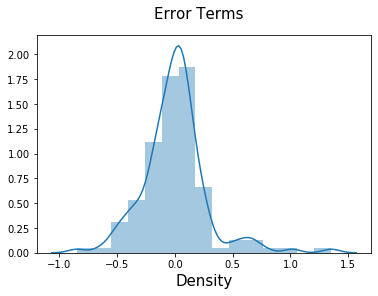

In [93]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)  # X-label
plt.xlabel('Density', fontsize = 15)  # Y-label
plt.show()

> The residuals are following a somewhat normally distributed pattern with a mean at Zero. This seems okay.

In [94]:
num_vars =['symboling','carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [95]:
x_test=df_test.drop(['price'],axis=1)
y_test=df_test['price']

In [96]:
x_test.shape

(52, 65)

In [97]:
model_10.drop(['const'],axis=1,inplace=True)

In [98]:
# Now let's use our model to make predictions.
# Creating x_test_model1 dataframe by taking only the variables that exist in the final train model_10
x_test_1 = x_test[model_10.columns]
# Adding a constant variable 
x_test_model_1 = sm.add_constant(x_test_1)

In [99]:
# Making predictions unsing the Tenth model
y_pred = lm10.predict(x_test_model_1)

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8863536033315095

##  **Model Evaluation** 

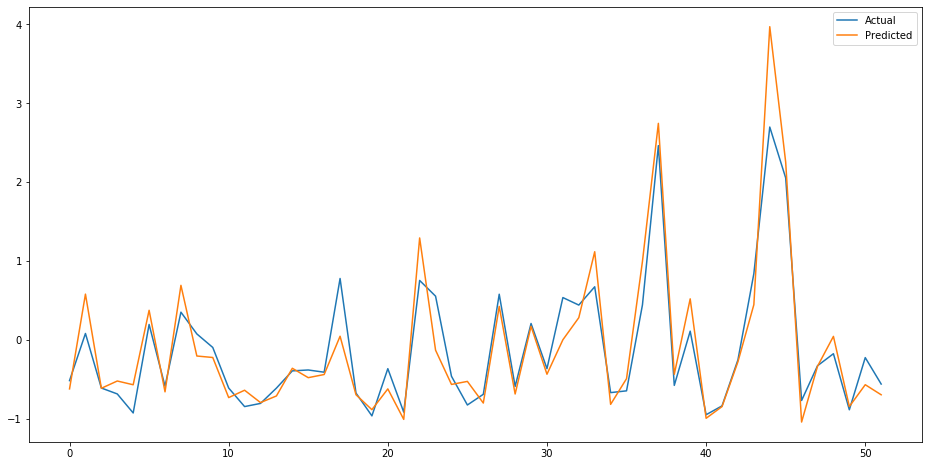

In [101]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:53])
plt.legend(['Actual','Predicted'])

Text(0, 0.5, 'y_pred')

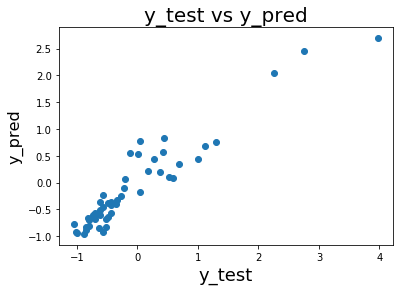

In [105]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # Y-label

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
doornumber_dummies=pd.get_dummies(df['doornumber'],drop_first=True)
doornumber_dummies.head()

In [ ]:
df['fueltype'].value_counts()

In [ ]:
df['enginelocation'].value_counts()

In [ ]:
print("Shape Before Dropping Engine location:",df.shape)
df.drop('enginelocation',axis=1,inplace=True)
print("Shape After Dropping Engine location:",df.shape)

In [ ]:
df['cylindernumber'].value_counts()

In [ ]:
print("Shape Before Dropping Cylinder Number:",df.shape)
df.drop('cylindernumber',axis=1,inplace=True)
print("Shape After Dropping Cylinder Number:",df.shape)

In [ ]:
df['enginetype'].value_counts()

In [ ]:
print("Shape Before Dropping Engine Type:",df.shape)
df.drop('enginetype',axis=1,inplace=True)
print("Shape After Dropping Engine Type:",df.shape)

In [ ]:
df['carbody'].value_counts()

In [ ]:
df['drivewheel'].value_counts()

In [ ]:
df['enginelocation'].value_counts()

In [ ]:
print("Shape Before Dropping Engine location:",df.shape)
df.drop('enginelocation',axis=1,inplace=True)
print("Shape After Dropping Engine location:",df.shape)

In [ ]:
df['fuelsystem'].value_counts()

In [ ]:
print("Shape Before Dropping Fuel System:",df.shape)
df.drop('fuelsystem',axis=1,inplace=True)
print("Shape After Dropping Fuel System:",df.shape)